# Team: Kayla and Hariraj
# Dataset1: Student Stress Factors: A comprehensive Analysis
 https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

# Preamble

In [84]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



# A. Exploration of Dataset

In [85]:
df_student_stress =pd.read_csv('StressLevelDataset.csv')
num_samples = df_student_stress.shape[0]
num_variables = df_student_stress.shape[1]
print(df_student_stress.axes)
print(df_student_stress.dtypes)
print(df_student_stress.head(10))

[RangeIndex(start=0, stop=1100, step=1), Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')]
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load

In [86]:

print("There are ", num_samples, 'samples and ', num_variables, 'raw features')


There are  1100 samples and  21 raw features


In [87]:
columns = df_student_stress.columns




isna_columns = []
for x in columns:
    count = df_student_stress[x].isna().sum()
    if count > 0:
        isna_columns.append(x)

print("There are", len(isna_columns), 'columns with missing values.')



There are 0 columns with missing values.


/Users/kaylaolivo/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


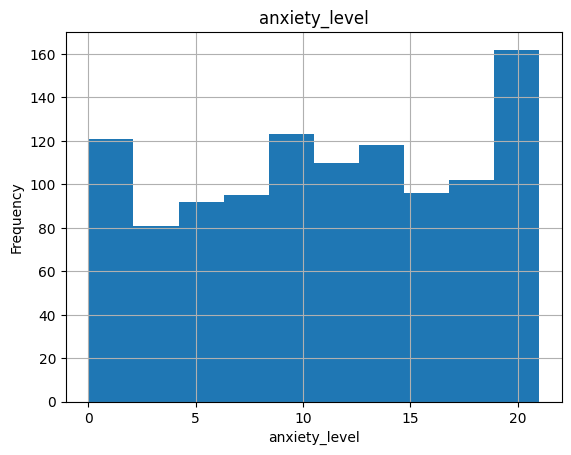

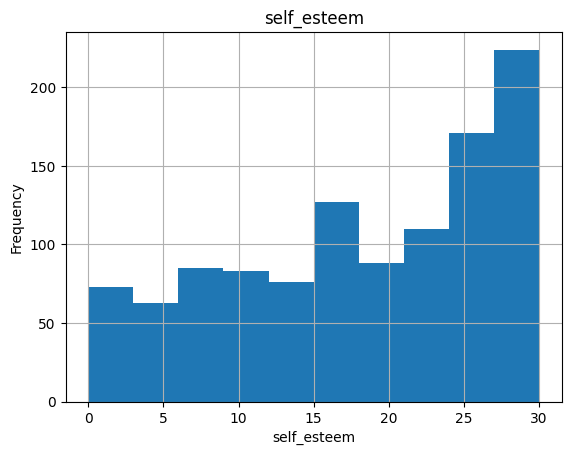

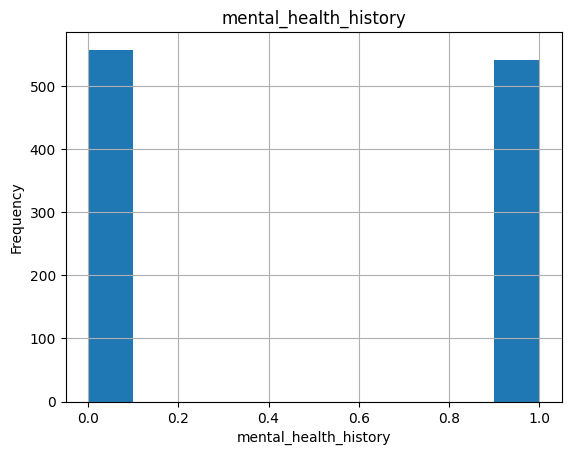

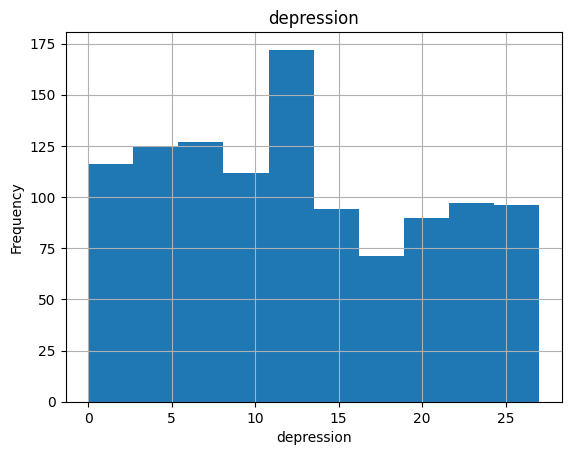

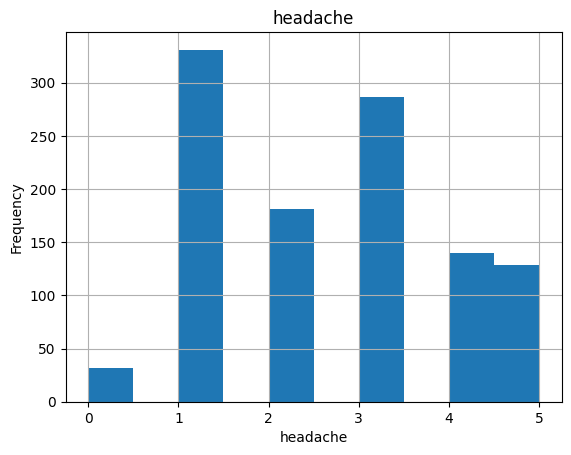

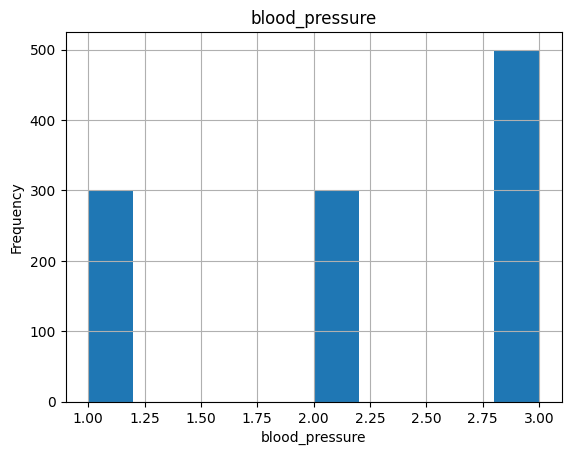

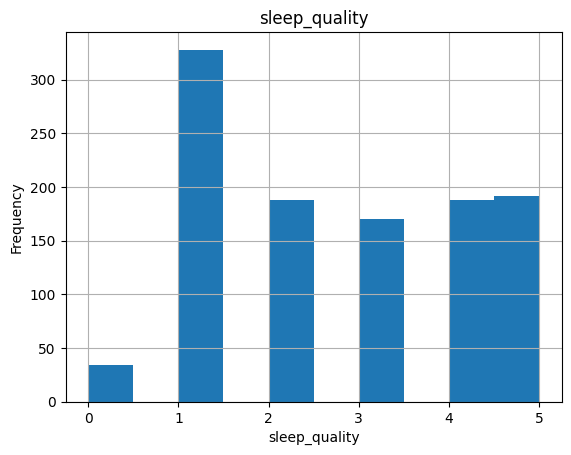

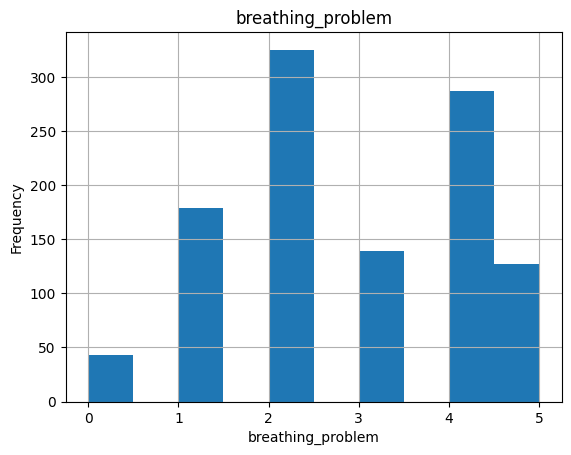

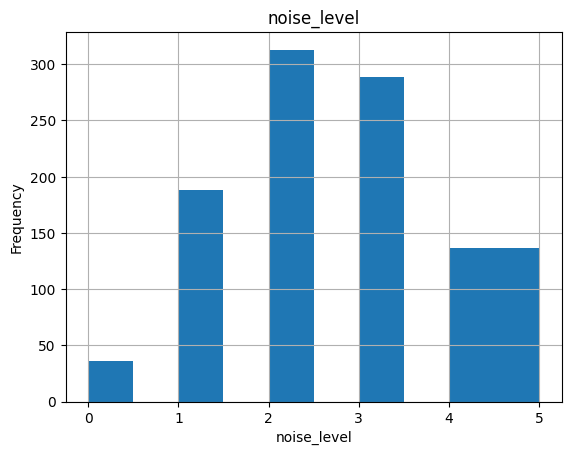

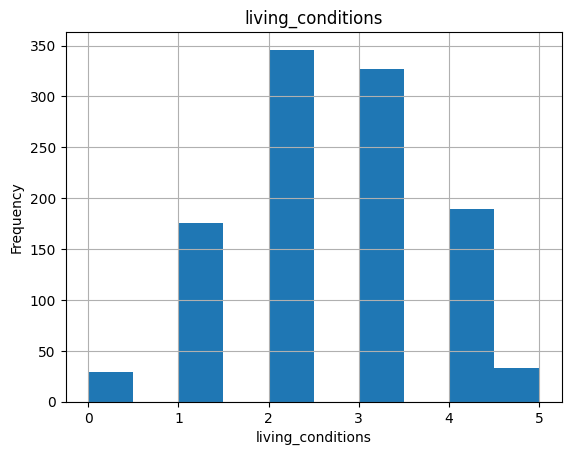

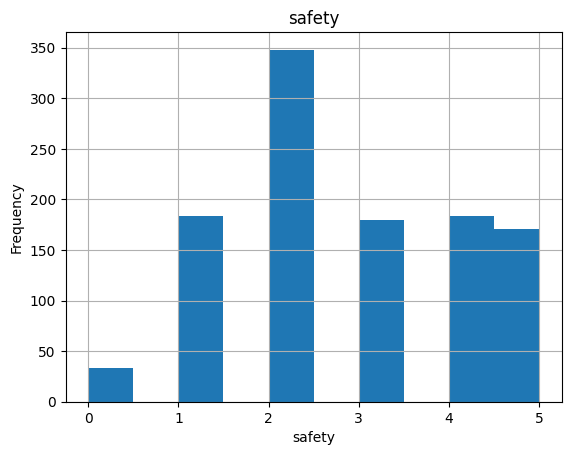

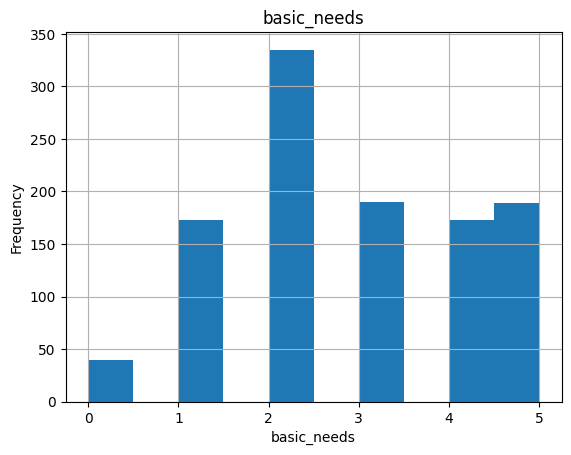

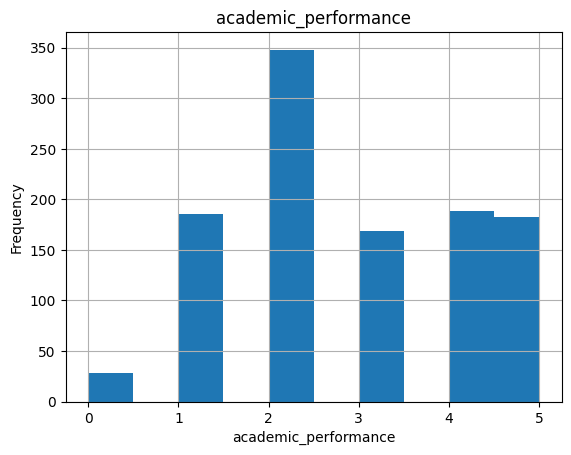

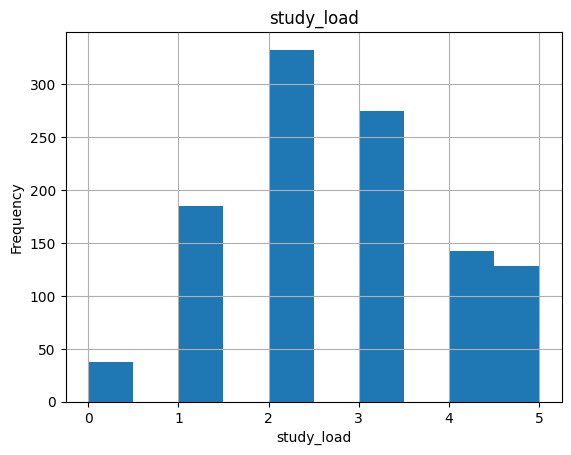

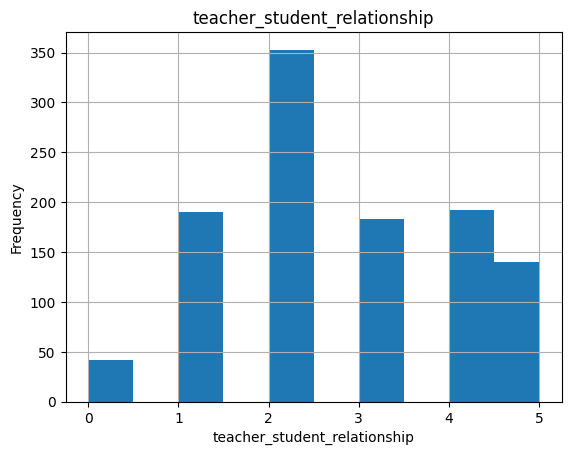

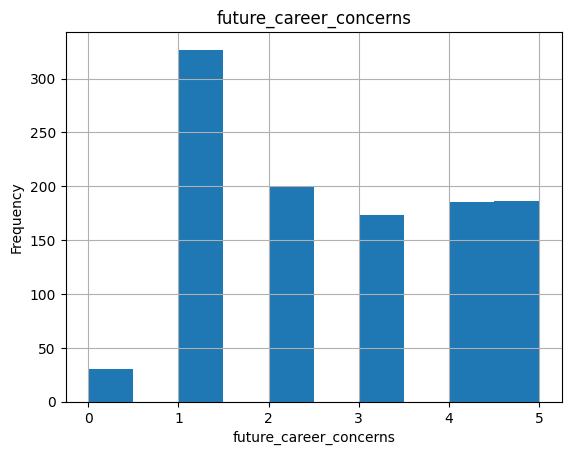

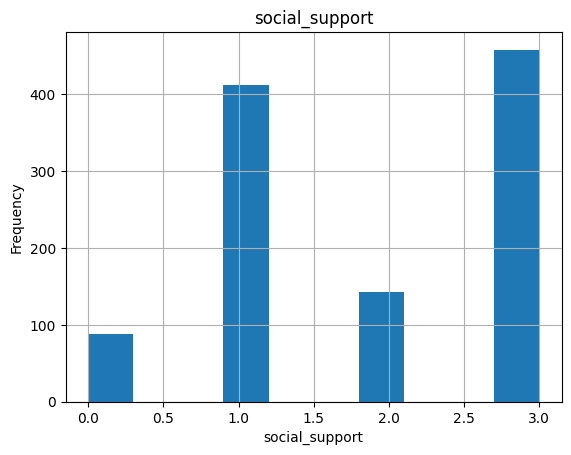

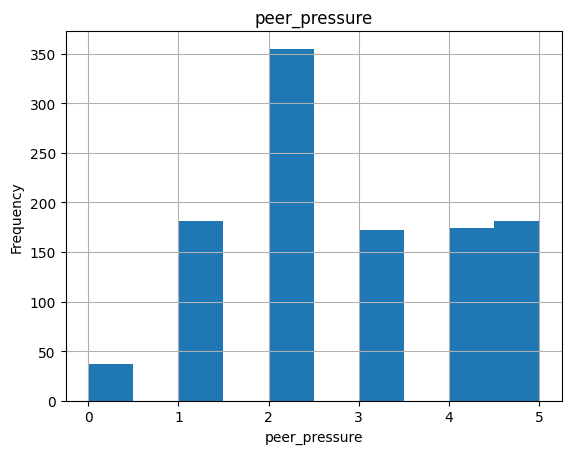

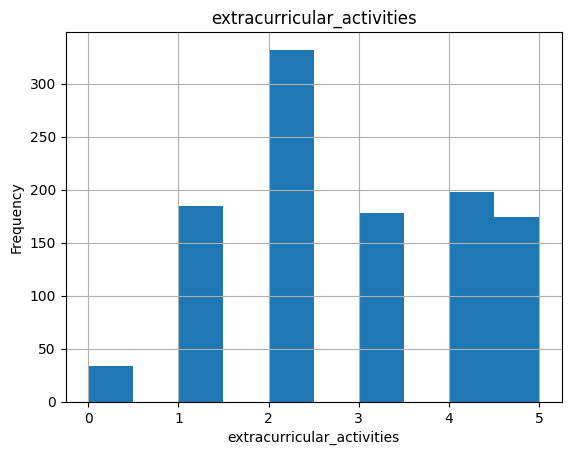

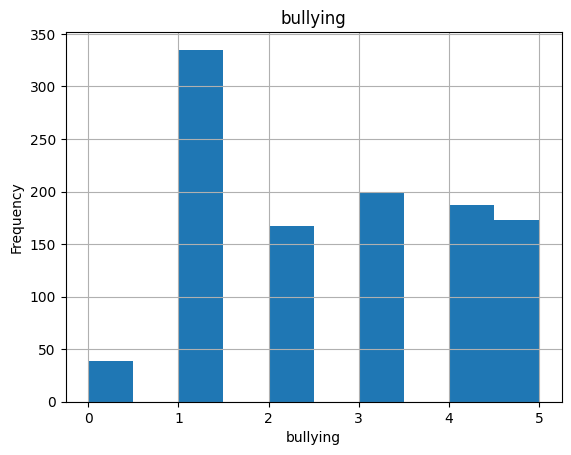

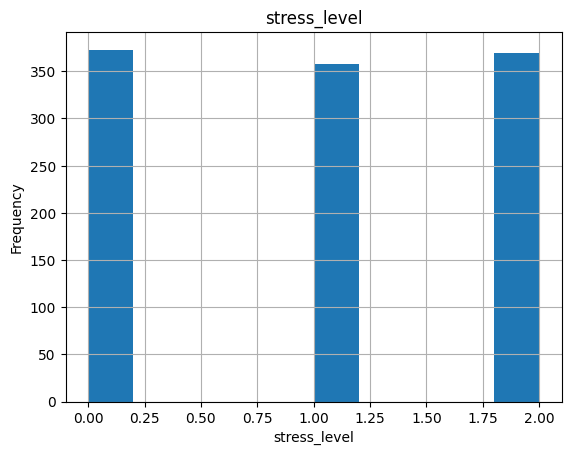

In [88]:
for x in columns: 
    df_student_stress.hist(column=x)
    plt.xlabel(x)
    plt.ylabel('Frequency')

According to the exploration of the dataset, we have learned that there are 21 features total. 20 of these features are independent variables and one is a dependent variable. The independent variable is stress level. The data in this dataset is not all raw data. From reading the kaggle description, we know that some of these features have been transformed to a scale, for example the stress level has been calculated to be a categorical variable rating student stress as 0, 1, or 2. There are 19 categorical variables. They all follow label encoding. These variables are all encoded to numerical scales. The categorical variables are: mental_health_history, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic needs, academic_performance, study_load, teacher_student_relationship, future_career_concerns, social_support, peer_pressure, extracurricular_activities, bullying, stress_level. There are 2 numerical variables, these are anxiety_level and self_esteem. 

# B. Pre Processing of Dataset

To replace invalid entries, for the 19 categorical variables, we check that each data sample contains the correct number for the variables(i.e. it is in the categorical variable range). Otherwise, we change the value to NaN. 

In [89]:

for row in df_student_stress.index.values:
    if df_student_stress.loc[row]['mental_health_history'] not in [0, 1]:
        df_student_stress[row]['mental_health_history'] = np.nan

    if df_student_stress.loc[row]['headache'] not in [0, 1, 2, 3, 4, 5]:
        df_student_stress[row]['headache'] = np.nan

    if df_student_stress.loc[row]['blood_pressure'] not in [1,2,3]:
        df_student_stress[row]['blood_pressure'] = np.nan

    if df_student_stress.loc[row]['sleep_quality'] not in [0, 1, 2,3,4,5]:
        df_student_stress[row]['sleep_quality'] = np.nan

    if df_student_stress.loc[row]['breathing_problem'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['breathing_problem'] = np.nan

    if df_student_stress.loc[row]['noise_level'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['noise_level'] = np.nan

    if df_student_stress.loc[row]['living_conditions'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['living_conditions'] = np.nan

    if df_student_stress.loc[row]['safety'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['safety'] = np.nan

    if df_student_stress.loc[row]['basic_needs'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['basic_needs'] = np.nan

    if df_student_stress.loc[row]['academic_performance'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['academic_performance'] = np.nan

    if df_student_stress.loc[row]['study_load'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['study_load'] = np.nan

    if df_student_stress.loc[row]['teacher_student_relationship'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['mteacher_student_relationship'] = np.nan

    if df_student_stress.loc[row]['future_career_concerns'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['future_career_concerns'] = np.nan

    if df_student_stress.loc[row]['social_support'] not in [0, 1,2,3]:
        df_student_stress[row]['social_support'] = np.nan

    if df_student_stress.loc[row]['peer_pressure'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['peer_pressure'] = np.nan

    if df_student_stress.loc[row]['extracurricular_activities'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['extracurricular_activities'] = np.nan

    if df_student_stress.loc[row]['bullying'] not in [0, 1,2,3,4,5]:
        df_student_stress[row]['bullying'] = np.nan

    if df_student_stress.loc[row]['stress_level'] not in [0, 1,2,]:
        df_student_stress[row]['stress_level'] = np.nan



Here, we standardize the numerical variables. 

In [90]:
numerical_variables =['anxiety_level', 'self_esteem', 'depression']
for variable in numerical_variables:
    df_student_stress[variable] = (df_student_stress[variable] - df_student_stress[variable].mean()) / df_student_stress[variable].std()

print(df_student_stress.head(20))

    anxiety_level  self_esteem  mental_health_history  depression  headache  \
0        0.479989     0.248499                      0   -0.201301         2   
1        0.643453    -1.093092                      1    0.316364         5   
2        0.153062     0.024901                      1    0.186948         2   
3        0.806917    -0.645895                      1    0.316364         4   
4        0.806917     1.142894                      0   -0.718966         2   
5        1.460773    -0.534096                      1    1.092861         3   
6       -1.154650     0.919295                      0   -0.848382         1   
7        0.970381    -1.652089                      1    1.222277         4   
8        0.316526     0.472098                      1   -0.071885         3   
9       -0.827722    -1.093092                      0    1.869358         4   
10       0.970381    -0.645895                      1    1.610526         4   
11       0.970381    -0.310497                      

Lastly, we replace any NaN values with the empirical median. 

In [91]:
for variable in columns:
    empirical_median = df_student_stress[variable].median()
    df_student_stress.replace({variable:'NaN'}, {variable: empirical_median}, inplace=True)

# Part C: Feature Extraction/Feature Learning

In [92]:
means = []
df_student_stress['Mean'] = df_student_stress[columns].mean(axis=1)
geometric_mean = sps.gmean(np.abs(df_student_stress[columns].values), axis=1)
df_student_stress['Geometric Mean'] = geometric_mean
harmonic_mean = sps.hmean(np.abs(df_student_stress[columns]), axis=1)
df_student_stress['Harmonic Mean'] = harmonic_mean
df_student_stress['Variance'] = df_student_stress[columns].var(axis=1)
kurtosis_value = sps.kurtosis(df_student_stress[columns], axis = 1)
df_student_stress['Kurtosis'] = kurtosis_value
skew_value = sps.skew(df_student_stress[columns], axis=1)
df_student_stress['Skew'] =skew_value




print(df_student_stress.head(40))

    anxiety_level  self_esteem  mental_health_history  depression  headache  \
0        0.479989     0.248499                      0   -0.201301         2   
1        0.643453    -1.093092                      1    0.316364         5   
2        0.153062     0.024901                      1    0.186948         2   
3        0.806917    -0.645895                      1    0.316364         4   
4        0.806917     1.142894                      0   -0.718966         2   
5        1.460773    -0.534096                      1    1.092861         3   
6       -1.154650     0.919295                      0   -0.848382         1   
7        0.970381    -1.652089                      1    1.222277         4   
8        0.316526     0.472098                      1   -0.071885         3   
9       -0.827722    -1.093092                      0    1.869358         4   
10       0.970381    -0.645895                      1    1.610526         4   
11       0.970381    -0.310497                      

All features in this dataset consist of numerical data. Therefore, in order to complete feature learning, we extracted important statistical values from each feature. These values include: the mean, geometric mean, harmonic mean, variance, kurtosis, and skew for each sample. 

# Part D: Processing using two different machine learning method

Method 1: Using SVC

In [93]:
X = df_student_stress[columns]
y = df_student_stress['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
final_model = make_pipeline(StandardScaler(), SVC(C=best_params['svc__C'], kernel=best_params['svc__kernel'], gamma=best_params['svc__gamma']))
final_model.fit(X_train, y_train)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
y_pred = final_model.predict(X_test)
df_student_stress['SVM_prediction'] = final_model.predict(X)

accuracy_SVM = accuracy_score(y_test, y_pred)
classification_rep_SVM = classification_report(y_test, y_pred)
confusion_mat_SVM = confusion_matrix(y_test, y_pred)
print(df_student_stress['SVM_prediction'])
print(accuracy_SVM)




0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: SVM_prediction, Length: 1100, dtype: int64
1.0


For this machine learning method, I used SVM. This is because since there are so many features(over 20) it is unlikely that there would be a way to linearly seperate the data. Therefore, a kernel function is needed. I refered to the Analytics Vidhya article[1] as well as the Medium article[2] on how to implement SVM using python. In order to tune the parameter, I used three different C values and also different kernel functions as shown in the code above. Then I used the 'best_params' method which choses the best option out of all combinations based on the accuracy scores. Finally, I added a 'prediciton' column to the dataset to represent the SVM classification to be able to compare it to the actual classification in the following steps. 

Method 2: QDA

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
qda = QuadraticDiscriminantAnalysis()
param_grid = {'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
grid_search = GridSearchCV(qda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_qda = QuadraticDiscriminantAnalysis(**best_params)
best_qda.fit(X_train, y_train)
y_pred = best_qda.predict(X_test)
df_student_stress['QDA_prediction'] = final_model.predict(X)
print(df_student_stress['SVM_prediction'])


accuracy_QDA = accuracy_score(y_test, y_pred)
print(accuracy_QDA)
classification_rep_QDA = classification_report(y_test, y_pred)
confusion_mat_QDA= confusion_matrix(y_test, y_pred)




0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: SVM_prediction, Length: 1100, dtype: int64
0.9636363636363636


/Users/kaylaolivo/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/kaylaolivo/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/kaylaolivo/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/kaylaolivo/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/kaylaolivo/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/kaylaolivo/Library/Python/3.9/lib/python/

For this method, I used QDA. I decided to use QDA because the data was not linearly seperable. For this model, I referenced articles [3] and [4] mentioned in the bibliography below. I used various parameters to train it on and then used the best_params method to select the parameter that resulted in the best performance. Finally, I added a 'prediciton' column to the dataset to represent the SVM classification to be able to compare it to the actual classification in the following steps. 

# Part E: Comparitive Analysis of the Two Methods

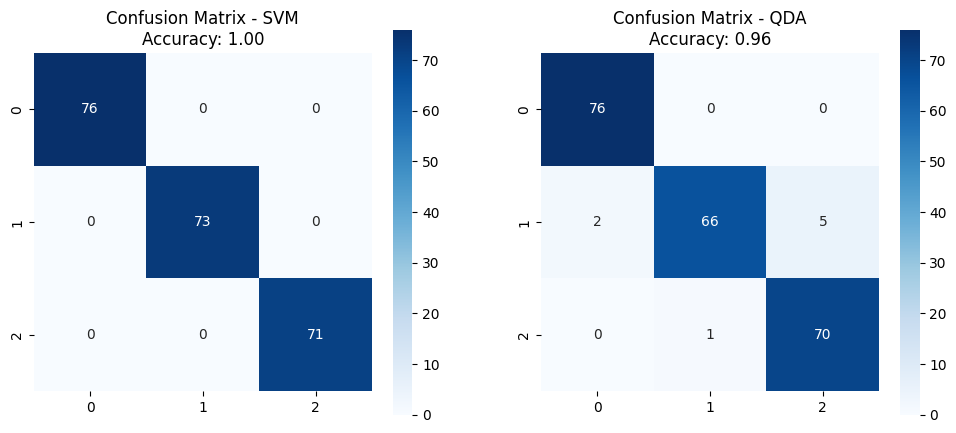

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_mat_SVM, annot=True, fmt='d', cmap='Blues', ax=axes[0])

axes[0].imshow(confusion_mat_SVM, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix - SVM\nAccuracy: {:.2f}'.format(accuracy_SVM))
sns.heatmap(confusion_mat_QDA, annot=True, fmt='d', cmap='Blues', ax=axes[1])

axes[1].imshow(confusion_mat_QDA, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Confusion Matrix - QDA\nAccuracy: {:.2f}'.format(accuracy_QDA))

plt.show()



Based on the confusion matrix and accuracy scores of both the QDA and SVM machine learning models, I would recommend to use the SVM. This model has a 100% accuracy rate and based on the confusion matrix, accurately classified all data samples. This means that it is a 'perfect' model based on this test data. The QDA classification is also pretty good as it has 96% accuracy, therefore this would be a valid option as well however some samples were misclassified. 

# Part F: Discussion on ethical issues

This dataset may have some ethical concerns that is important to note through the processing and analysis of this data. One concern ins privacy and confidentiality. The data collected contains sensitive information related to students mental and physical health. This raises concerns if this breaches any laws such as HIPPA. It is important that to address this concern that all identities of the student remain anonymous. Another ethical consideration is bias. There may be some bias in the way that this data is collected, for example if the income of the student may correlate to their stress level. If this were the case, this data would disproportionately affect students in lower income to have higher stress levels without considering external factors. One way to mitigate this is to include data that incorperates a students environmental factors into the stress calculation. This is done in this dataset through the 'living conditions' feature. Including this feature ensures that a students socioeconomic status won't introduce bias into calculating the stress level. The last ethical concern raised in this dataset is awareness and consent. Depending on the age of these students and if they are minors, it is important to take the correct protocol into getting the student/parent consent to use this data for research on student stress levels. 

# Part G: Bibliography

[1] https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
[2] https://medium.com/@24littledino/support-vector-machine-svm-in-python-fc3a4ffd25b6
[3] https://scikit-learn.org/0.15/modules/generated/sklearn.qda.QDA.html
[4]https://vnaghshin.medium.com/discriminant-analysis-for-data-science-python-5280fac650d7